# Problem klas niezbalansowanych 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

#### Case study 

W pliku `creditcardfraud.csv` znajdziecie plik z danymi o transakcjach kartami płatniczymi wraz z informacją, czy dana transakcja to fraud. Zbadaj dane pod kątem ich niezbalansowania. Zaproponuj metrykę którą ocenisz jakość predykcji, a następnie zbuduj jak najlepszy model pod kątem tej metryki.

https://github.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/blob/master/creditcard.csv

https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [26]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
data['Class'].mean()

0.001727485630620034

In [28]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

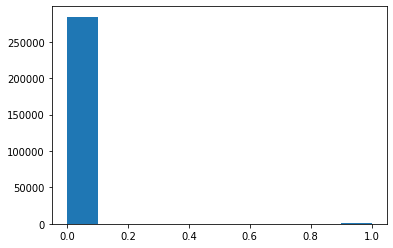

In [29]:
y = data['Class']

plt.hist(y)
plt.show()

In [30]:
X = data.filter(regex="V")
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

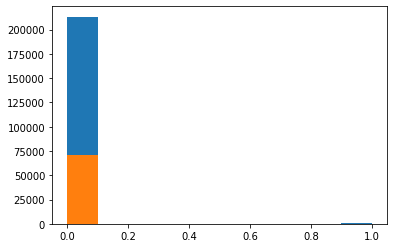

In [32]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

In [33]:
print("train")
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==1])/len(y_train[y_train==0]))
print()
print("test")
print(len(y_test[y_test==0]))
print(len(y_test[y_test==1]))
print(len(y_test[y_test==1])/len(y_test[y_test==0]))
print()

train
213226
379
0.0017774567829439186

test
71089
113
0.0015895567528028246



# Zad

Proszę znaleść optymalny model przypadku

 * Oversampling
 * Undersampling


In [34]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [35]:
X_smaller = X_train.values
y_smaller = y_train.values

In [36]:
# type(X_smaller)

In [37]:
X_smaller = X_train.values
y_smaller = y_train.values

X_smaller_0 = X_smaller[y_smaller == 0, :]
X_smaller_1 = X_smaller[y_smaller == 1, :]

print(X_smaller_0.shape, X_smaller_1.shape)

indices_0_undersampled = np.random.choice(X_smaller_0.shape[0], size=X_smaller_1.shape[0], replace=False)

X_undersampled_0 = X_smaller_0[indices_0_undersampled]

X_undersampled = np.vstack([X_undersampled_0, X_smaller_1])

y_undersampled = np.array([0]*X_undersampled_0.shape[0] + [1]*X_smaller_1.shape[0]) 

print(X_undersampled.shape, y_undersampled.shape)

(213226, 28) (379, 28)
(758, 28) (758,)


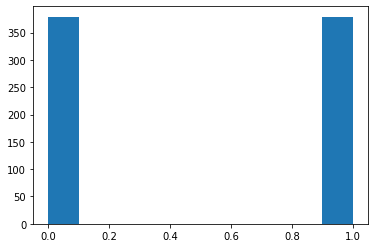

In [38]:
plt.hist(y_undersampled)
plt.show()
# y_undersampled

In [39]:
model_undersampled = LogisticRegression()
model_undersampled.fit(X_undersampled, y_undersampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model_undersampled.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn import metrics
metrics.f1_score(y_true= y_test ,y_pred= model_undersampled.predict(X_test))

0.07948523845571537

In [42]:
from sklearn import metrics
metrics.accuracy_score(y_true= y_test ,y_pred= model_undersampled.predict(X_test))

0.9658436560770765

# Oversampling

(426224, 28) (426224,)


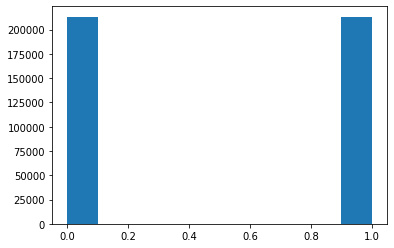

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
X_oversampled_1 = np.vstack([X_smaller_1]*562)
X_oversampled_1.shape

X_oversampled = np.vstack([X_smaller_0, X_oversampled_1])

y_oversampled = np.array([0]*X_smaller_0.shape[0] + [1]*X_oversampled_1.shape[0]) 

print(X_oversampled.shape, y_oversampled.shape)

plt.hist(y_oversampled)
plt.show()

model_oversampled = LogisticRegression()
model_oversampled.fit(X_oversampled, y_oversampled)

In [24]:
from sklearn import metrics
metrics.f1_score(y_test , model_oversampled.predict(X_test))

0.10478589420654912

In [43]:
from sklearn.ensemble import RandomForestClassifier

# pipe_7 = Pipeline([('preprocessing', preprocess_pipeline), 
#                    ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
#                   ])

# param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
#               'classifier__max_leaf_nodes': [10, 20],
#               'classifier__max_depth': [10, 20]
#              }

# grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

# grid_7.fit(train_data, y_train)
# grid_7.best_params_


In [44]:
model_oversampled = RandomForestClassifier()
model_oversampled.fit(X_oversampled, y_oversampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
from sklearn import metrics
metrics.f1_score(y_test , model_oversampled.predict(X_test))

0.861244019138756

 # Zad

Proszę znaleść optymalny model przypadku

 * Ważona funkcja straty

(212998, 28)

(426224, 28) (426224,)


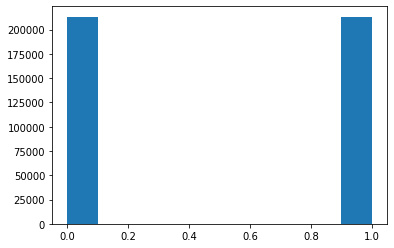

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model_oversampled.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])